In [1]:
%pip install pandas numpy matplotlib scikit-learn keras
%pip install setuptools pydot


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from keras.api.models import Sequential
from keras.api.layers import Dense, LSTM

2024-08-06 22:01:25.490259: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 22:01:25.723005: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 22:01:25.946688: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 22:01:26.153742: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 22:01:26.219503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 22:01:26.577478: I tensorflow/core/platform/cpu_feature_gu

In [2]:
df = pd.read_csv('MSFT.csv')

In [4]:
data = df.filter(['Close'])
dataset = data.values
# take 95% of data to train
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

2392

In [5]:
# scale data for better model training
scaler = MinMaxScaler(feature_range=(0,1))
log_transformer = FunctionTransformer(lambda x: np.log(x))
scaled_data = log_transformer.fit_transform(dataset)
scaled_data = scaler.fit_transform(scaled_data)

In [6]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.93136144, 0.9449054 , 0.95342393, 0.95463483, 0.9590668 ,
       0.96272527, 0.96132721, 0.95468358, 0.96479439, 0.97968914,
       0.97793391, 0.97252911, 0.97556017, 0.97846771, 0.98394919,
       0.98795859, 0.98759   , 0.98862301, 0.99885548, 0.99294219,
       0.99884673, 1.        , 0.99403258, 0.99271132, 0.99044014,
       0.9816103 , 0.98695993, 0.98633791, 0.98524482, 0.98226691,
       0.98418507, 0.98046784, 0.98105318, 0.98290427, 0.97759301,
       0.97667949, 0.97619883, 0.96837379, 0.96381358, 0.95996284,
       0.96060716, 0.9601168 , 0.95240556, 0.94989778, 0.95148292,
       0.95103065, 0.96505111, 0.96614272, 0.96599102, 0.96298329,
       0.96633227, 0.96492752, 0.96139435, 0.95644447, 0.95720096,
       0.9592211 , 0.95288569, 0.95009503, 0.95109951, 0.94871229])]
[0.9469474492772538]

[array([0.93136144, 0.9449054 , 0.95342393, 0.95463483, 0.9590668 ,
       0.96272527, 0.96132721, 0.95468358, 0.96479439, 0.97968914,
       0.97793391, 0.97252911, 0.975

In [7]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=10)

/home/yuu/Code/stock-market-data-set/.env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 103s 43ms/step - loss: 0.0041
Epoch 2/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 161s 51ms/step - loss: 4.5900e-04
Epoch 3/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 122s 43ms/step - loss: 4.0060e-04
Epoch 4/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 96s 41ms/step - loss: 2.6986e-04
Epoch 5/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 65s 28ms/step - loss: 1.9545e-04
Epoch 6/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - loss: 2.0282e-04
Epoch 7/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - loss: 1.8710e-04
Epoch 8/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - loss: 1.9299e-04
Epoch 9/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - loss: 1.6382e-04
Epoch 10/10
2332/2332 ━━━━━━━━━━━━━━━━━━━━ 50s 21ms/step - loss: 1.6979e-04


In [10]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
exp_transformer = FunctionTransformer(lambda x: np.exp(x))
predictions = exp_transformer.transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [11]:
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo phần trăm sai số tuyệt đối trung bình
from sklearn.metrics import mean_squared_error

#rmse
print ('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predictions)))
#r2
print('R2 score: ',r2_score(y_test,predictions))
#mae
print('Mean absolute error: ',mean_absolute_error(y_test,predictions))
#mape
print('Mean absolute percentage error: ',mean_absolute_percentage_error(y_test,predictions))

Root Mean Squared Error:  1.003743575412894
R2 score:  0.7017733483823916
Mean absolute error:  0.7844839978027347
Mean absolute percentage error:  0.016872492128882338


/tmp/ipykernel_2922/453868555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


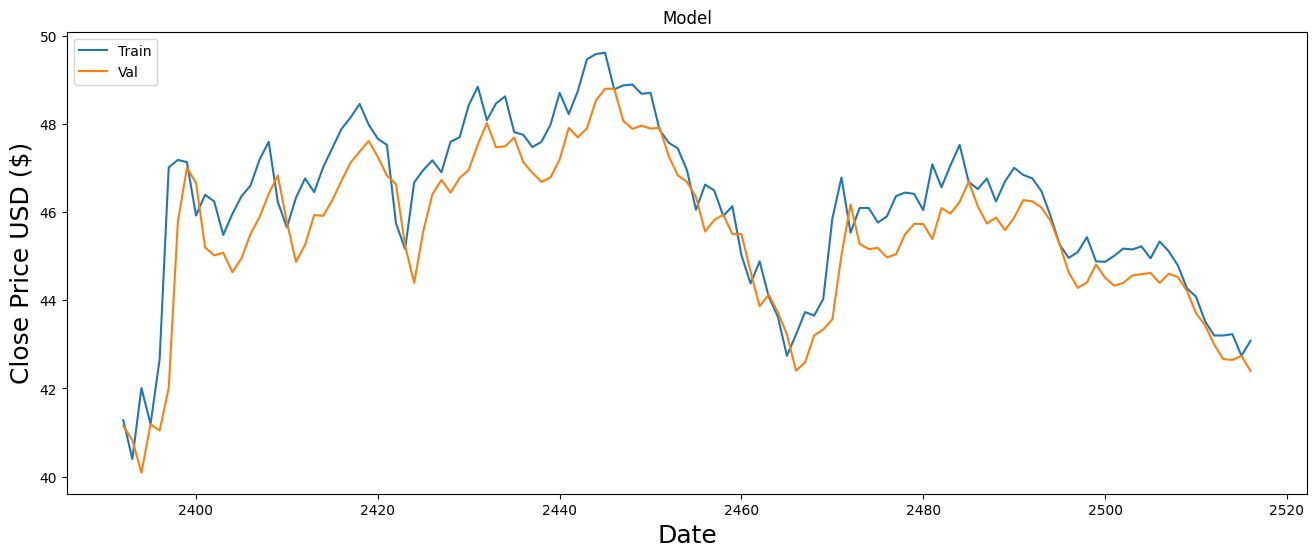

In [12]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()